In [ ]:
# –õ–∞–±–æ—Ä–∞—Ç–æ—Ä–Ω–∞ —Ä–æ–±–æ—Ç–∞ 3: –ú–æ–¥–µ–ª—é–≤–∞–Ω–Ω—è –°–ú–û (–°–∏—Å—Ç–µ–º–∞ –ú–∞—Å–æ–≤–æ–≥–æ –û–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è)
# –ú–æ–¥–µ–ª—å –∫–æ–ª-—Ü–µ–Ω—Ç—Ä—É –∑ –¥–≤–æ–º–∞ —Ç–∏–ø–∞–º–∏ –≤—ñ–¥–º–æ–≤: Balking —Ç–∞ Reneging

import simpy
import random
import statistics
import matplotlib.pyplot as plt
import numpy as np

## 1. –ü–∞—Ä–∞–º–µ—Ç—Ä–∏ –º–æ–¥–µ–ª—ñ

–í–∏–∑–Ω–∞—á–∞—î–º–æ –≤—Å—ñ –∫–ª—é—á–æ–≤—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ —Å–∏–º—É–ª—è—Ü—ñ—ó –∫–æ–ª-—Ü–µ–Ω—Ç—Ä—É —ñ–Ω—Ç–µ—Ä–Ω–µ—Ç-–º–∞–≥–∞–∑–∏–Ω—É.

In [2]:
# ==================== –ü–ê–†–ê–ú–ï–¢–†–ò –ú–û–î–ï–õ–Ü ====================

# –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó (—Ö–≤–∏–ª–∏–Ω–∏)
SIM_DURATION = 480  # 8-–≥–æ–¥–∏–Ω–Ω–∏–π —Ä–æ–±–æ—á–∏–π –¥–µ–Ω—å

# –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ (–∫–∞–Ω–∞–ª—ñ–≤ –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è)
NUM_OPERATORS = 3

# –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏ (—Ö–≤–∏–ª–∏–Ω–∏)
AVG_ARRIVAL_INTERVAL = 2.0

# –ß–∞—Å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è (—Ä–æ–∑–º–æ–≤–∏) - —Ö–≤–∏–ª–∏–Ω–∏
MIN_SERVICE_TIME = 3.0
MAX_SERVICE_TIME = 8.0

# –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∞ –¥–æ–≤–∂–∏–Ω–∞ —á–µ—Ä–≥–∏
MAX_QUEUE_SIZE = 5

# –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è –∫–ª—ñ—î–Ω—Ç–∞ (—Ö–≤–∏–ª–∏–Ω–∏)
PATIENCE_TIME = 10.0

# –î–µ—Ç–∞–ª—å–Ω–∏–π –≤–∏–≤—ñ–¥ –ø–æ–¥—ñ–π (True/False)
VERBOSE = False  # –ó–º—ñ–Ω—ñ—Ç—å –Ω–∞ True –¥–ª—è –¥–µ—Ç–∞–ª—å–Ω–æ–≥–æ –ª–æ–≥—É

print("–ü–∞—Ä–∞–º–µ—Ç—Ä–∏ –º–æ–¥–µ–ª—ñ –≤—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ:")
print(f"  - –¢—Ä–∏–≤–∞–ª—ñ—Å—Ç—å —Å–∏–º—É–ª—è—Ü—ñ—ó: {SIM_DURATION} —Ö–≤")
print(f"  - –û–ø–µ—Ä–∞—Ç–æ—Ä–∏: {NUM_OPERATORS}")
print(f"  - –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: {AVG_ARRIVAL_INTERVAL} —Ö–≤")
print(f"  - –ß–∞—Å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è: {MIN_SERVICE_TIME}-{MAX_SERVICE_TIME} —Ö–≤")
print(f"  - –ú–∞–∫—Å. —Ä–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: {MAX_QUEUE_SIZE}")
print(f"  - –¢–µ—Ä–ø—ñ–Ω–Ω—è –∫–ª—ñ—î–Ω—Ç–∞: {PATIENCE_TIME} —Ö–≤")

–ü–∞—Ä–∞–º–µ—Ç—Ä–∏ –º–æ–¥–µ–ª—ñ –≤—Å—Ç–∞–Ω–æ–≤–ª–µ–Ω–æ:
  - –¢—Ä–∏–≤–∞–ª—ñ—Å—Ç—å —Å–∏–º—É–ª—è—Ü—ñ—ó: 480 —Ö–≤
  - –û–ø–µ—Ä–∞—Ç–æ—Ä–∏: 3
  - –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: 2.0 —Ö–≤
  - –ß–∞—Å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è: 3.0-8.0 —Ö–≤
  - –ú–∞–∫—Å. —Ä–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: 5
  - –¢–µ—Ä–ø—ñ–Ω–Ω—è –∫–ª—ñ—î–Ω—Ç–∞: 10.0 —Ö–≤


## 2. –ö–ª–∞—Å –¥–ª—è –∑–±–æ—Ä—É —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏

–°—Ç–≤–æ—Ä—é—î–º–æ –∫–ª–∞—Å –¥–ª—è –≤—ñ–¥—Å—Ç–µ–∂–µ–Ω–Ω—è –≤—Å—ñ—Ö –º–µ—Ç—Ä–∏–∫ —Å–∏–º—É–ª—è—Ü—ñ—ó.

In [3]:
class Statistics:
    """–ö–ª–∞—Å –¥–ª—è –∑–±–æ—Ä—É —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏ —Å–∏–º—É–ª—è—Ü—ñ—ó"""
    def __init__(self):
        self.total_calls = 0        # –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤
        self.balked_calls = 0       # –í—ñ–¥–º–æ–≤–∏ —á–µ—Ä–µ–∑ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω—É —á–µ—Ä–≥—É (Balking)
        self.reneged_calls = 0      # –í—ñ–¥–º–æ–≤–∏ —á–µ—Ä–µ–∑ –¥–æ–≤–≥–µ –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (Reneging)
        self.processed_calls = 0    # –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω—ñ –¥–∑–≤—ñ–Ω–∫–∏
        self.wait_times = []        # –ß–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è –¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö
        
    def reset(self):
        """–°–∫–∏–¥–∞—î –≤—Å—é —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É"""
        self.__init__()
        
    def print_summary(self):
        """–í–∏–≤–æ–¥–∏—Ç—å –ø—ñ–¥—Å—É–º–∫–æ–≤—É —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É"""
        print("=" * 70)
        print("–†–ï–ó–£–õ–¨–¢–ê–¢–ò –°–ò–ú–£–õ–Ø–¶–Ü–á")
        print("=" * 70)
        
        print(f"\n–ó–ê–ì–ê–õ–¨–ù–ê –°–¢–ê–¢–ò–°–¢–ò–ö–ê:")
        print(f"  –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤: {self.total_calls}")
        print(f"  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: {self.processed_calls}")
        print(f"  –í—Ç—Ä–∞—á–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤: {self.balked_calls + self.reneged_calls}")
        
        print(f"\n–í–Ü–î–ú–û–í–ò:")
        balking_percent = (self.balked_calls / self.total_calls * 100) if self.total_calls > 0 else 0
        print(f"  Balking (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞): {self.balked_calls} ({balking_percent:.1f}%)")
        
        reneging_percent = (self.reneged_calls / self.total_calls * 100) if self.total_calls > 0 else 0
        print(f"  Reneging (–≤–∏–π—à–ª–∏ –∑ —á–µ—Ä–≥–∏): {self.reneged_calls} ({reneging_percent:.1f}%)")
        
        lost_percent = ((self.balked_calls + self.reneged_calls) / self.total_calls * 100) if self.total_calls > 0 else 0
        print(f"  –ó–ê–ì–ê–õ–¨–ù–ò–ô % –≤—Ç—Ä–∞—á–µ–Ω–∏—Ö: {lost_percent:.1f}%")
        
        print(f"\n–û–ë–°–õ–£–ì–û–í–£–í–ê–ù–ù–Ø:")
        success_percent = (self.processed_calls / self.total_calls * 100) if self.total_calls > 0 else 0
        print(f"  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: {self.processed_calls} ({success_percent:.1f}%)")
        
        if self.wait_times:
            avg_wait = statistics.mean(self.wait_times)
            min_wait = min(self.wait_times)
            max_wait = max(self.wait_times)
            median_wait = statistics.median(self.wait_times)
            
            print(f"\n–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø (–¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤):")
            print(f"  –°–µ—Ä–µ–¥–Ω—ñ–π: {avg_wait:.2f} —Ö–≤")
            print(f"  –ú–µ–¥—ñ–∞–Ω–∞: {median_wait:.2f} —Ö–≤")
            print(f"  –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π: {min_wait:.2f} —Ö–≤")
            print(f"  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π: {max_wait:.2f} —Ö–≤")
        else:
            print(f"\n–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø: –ù–µ–º–∞—î –¥–∞–Ω–∏—Ö")
            
        print("=" * 70)

# –°—Ç–≤–æ—Ä—é—î–º–æ –≥–ª–æ–±–∞–ª—å–Ω–∏–π –æ–±'—î–∫—Ç —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫–∏
stats = Statistics()
print("–ö–ª–∞—Å Statistics —Å—Ç–≤–æ—Ä–µ–Ω–æ")

–ö–ª–∞—Å Statistics —Å—Ç–≤–æ—Ä–µ–Ω–æ


## 3. –ü—Ä–æ—Ü–µ—Å –∫–ª—ñ—î–Ω—Ç–∞ (customer_call)

–¶–µ –æ—Å–Ω–æ–≤–Ω–∞ —Ñ—É–Ω–∫—Ü—ñ—è, —è–∫–∞ –º–æ–¥–µ–ª—é—î –ø–æ–≤–µ–¥—ñ–Ω–∫—É –æ–¥–Ω–æ–≥–æ –∫–ª—ñ—î–Ω—Ç–∞:

1. **Balking** - –∫–ª—ñ—î–Ω—Ç –ø–µ—Ä–µ–≤—ñ—Ä—è—î –¥–æ–≤–∂–∏–Ω—É —á–µ—Ä–≥–∏ –ü–ï–†–ï–î —Ç–∏–º —è–∫ —Å—Ç–∞—Ç–∏ –≤ –Ω–µ—ó. –Ø–∫—â–æ —á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞ (>= MAX_QUEUE_SIZE), –∫–ª—ñ—î–Ω—Ç –Ω–µ —Å—Ç–∞—î –≤ —á–µ—Ä–≥—É.

2. **Reneging** - —è–∫—â–æ –∫–ª—ñ—î–Ω—Ç —Å—Ç–∞–≤ –≤ —á–µ—Ä–≥—É, –≤—ñ–Ω —á–µ–∫–∞—î –∑ –æ–±–º–µ–∂–µ–Ω–∏–º —Ç–µ—Ä–ø—ñ–Ω–Ω—è–º (PATIENCE_TIME). –Ø–∫—â–æ –Ω–µ –¥–æ—á–µ–∫–∞–≤—Å—è –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞, –≤—ñ–Ω –≤–∏—Ö–æ–¥–∏—Ç—å –∑ —á–µ—Ä–≥–∏.

3. **–û–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è** - —è–∫—â–æ –∫–ª—ñ—î–Ω—Ç –¥–æ—á–µ–∫–∞–≤—Å—è, –≤—ñ–Ω —Å–ø—ñ–ª–∫—É—î—Ç—å—Å—è –∑ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º –ø—Ä–æ—Ç—è–≥–æ–º –≤–∏–ø–∞–¥–∫–æ–≤–æ–≥–æ —á–∞—Å—É (MIN_SERVICE_TIME - MAX_SERVICE_TIME).

In [4]:
def customer_call(env, customer_id, operators):
    """
    –ú–æ–¥–µ–ª—é—î –æ–¥–∏–Ω –¥–∑–≤—ñ–Ω–æ–∫ –∫–ª—ñ—î–Ω—Ç–∞ –≤ –∫–æ–ª-—Ü–µ–Ω—Ç—Ä

    Args:
        env: —Å–µ—Ä–µ–¥–æ–≤–∏—â–µ SimPy
        customer_id: —É–Ω—ñ–∫–∞–ª—å–Ω–∏–π —ñ–¥–µ–Ω—Ç–∏—Ñ—ñ–∫–∞—Ç–æ—Ä –∫–ª—ñ—î–Ω—Ç–∞
        operators: —Ä–µ—Å—É—Ä—Å SimPy (–æ–ø–µ—Ä–∞—Ç–æ—Ä–∏)
    """
    arrival_time = env.now
    if VERBOSE:
        print(f"[{env.now:.1f} —Ö–≤] –ö–ª—ñ—î–Ω—Ç #{customer_id} –¥–∑–≤–æ–Ω–∏—Ç—å")

    # ===== BALKING: –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —á–µ—Ä–≥–∏ –ü–ï–†–ï–î –∑–∞–ø–∏—Ç–æ–º =====
    queue_length = len(operators.queue)
    if queue_length >= MAX_QUEUE_SIZE:
        if VERBOSE:
            print(f"[{env.now:.1f} —Ö–≤] –ö–ª—ñ—î–Ω—Ç #{customer_id} –ù–ï —Å—Ç–∞—î –≤ —á–µ—Ä–≥—É (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞: {queue_length})")
        stats.balked_calls += 1
        return  # –í—ñ–¥–º–æ–≤–∞ —Ç–∏–ø—É Balking

    # ===== –ö–ª—ñ—î–Ω—Ç —Ä–æ–±–∏—Ç—å –∑–∞–ø–∏—Ç –Ω–∞ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ =====
    request = operators.request()
    if VERBOSE:
        print(f"[{env.now:.1f} —Ö–≤] –ö–ª—ñ—î–Ω—Ç #{customer_id} —Å—Ç–∞—î –≤ —á–µ—Ä–≥—É (–¥–æ–≤–∂–∏–Ω–∞: {queue_length})")

    # ===== RENEGING: –û—á—ñ–∫—É–≤–∞–Ω–Ω—è –∑ –æ–±–º–µ–∂–µ–Ω–∏–º —Ç–µ—Ä–ø—ñ–Ω–Ω—è–º =====
    # –ß–µ–∫–∞—î–º–æ –Ω–∞ –¥–≤—ñ –ø–æ–¥—ñ—ó –æ–¥–Ω–æ—á–∞—Å–Ω–æ: –æ—Ç—Ä–∏–º–∞–Ω–Ω—è —Ä–µ—Å—É—Ä—Å—É –ê–ë–û –∑–∞–∫—ñ–Ω—á–µ–Ω–Ω—è —Ç–µ—Ä–ø—ñ–Ω–Ω—è
    results = yield request | env.timeout(PATIENCE_TIME)

    # ===== –ü–µ—Ä–µ–≤—ñ—Ä–∫–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É: –¥–æ—á–µ–∫–∞–≤—Å—è —á–∏ –Ω—ñ? =====
    if request in results:
        # –ö–ª—ñ—î–Ω—Ç –î–û–ß–ï–ö–ê–í–°–Ø –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞
        wait_time = env.now - arrival_time
        if VERBOSE:
            print(f"[{env.now:.1f} —Ö–≤] –ö–ª—ñ—î–Ω—Ç #{customer_id} –æ—Ç—Ä–∏–º–∞–≤ –æ–ø–µ—Ä–∞—Ç–æ—Ä–∞ (–æ—á—ñ–∫—É–≤–∞–≤ {wait_time:.1f} —Ö–≤)")

        # –§—ñ–∫—Å—É—î–º–æ —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è
        stats.wait_times.append(wait_time)

        # ===== –û–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è (—Ä–æ–∑–º–æ–≤–∞ –∑ –æ–ø–µ—Ä–∞—Ç–æ—Ä–æ–º) =====
        service_time = random.uniform(MIN_SERVICE_TIME, MAX_SERVICE_TIME)
        yield env.timeout(service_time)

        if VERBOSE:
            print(f"[{env.now:.1f} —Ö–≤] –ö–ª—ñ—î–Ω—Ç #{customer_id} –∑–∞–≤–µ—Ä—à–∏–≤ —Ä–æ–∑–º–æ–≤—É (—Ç—Ä–∏–≤–∞–ª—ñ—Å—Ç—å: {service_time:.1f} —Ö–≤)")

        # –ó–≤—ñ–ª—å–Ω–µ–Ω–Ω—è —Ä–µ—Å—É—Ä—Å—É
        yield operators.release(request)

        # –§—ñ–∫—Å—É—î–º–æ —É—Å–ø—ñ—à–Ω–µ –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è
        stats.processed_calls += 1

    else:
        # –ö–ª—ñ—î–Ω—Ç –ù–ï –¥–æ—á–µ–∫–∞–≤—Å—è - —Ç–µ—Ä–ø—ñ–Ω–Ω—è –∑–∞–∫—ñ–Ω—á–∏–ª–æ—Å—è (RENEGING)
        wait_time = env.now - arrival_time
        if VERBOSE:
            print(f"[{env.now:.1f} —Ö–≤] –ö–ª—ñ—î–Ω—Ç #{customer_id} –≤–∏—Ö–æ–¥–∏—Ç—å –∑ —á–µ—Ä–≥–∏ (—á–µ–∫–∞–≤ {wait_time:.1f} —Ö–≤)")

        # –ö–†–ò–¢–ò–ß–ù–û –í–ê–ñ–õ–ò–í–û: –°–∫–∞—Å—É–≤–∞—Ç–∏ –∑–∞–ø–∏—Ç!
        request.cancel()

        # –§—ñ–∫—Å—É—î–º–æ –≤—ñ–¥–º–æ–≤—É —Ç–∏–ø—É Reneging
        stats.reneged_calls += 1

print("–§—É–Ω–∫—Ü—ñ—è customer_call —Å—Ç–≤–æ—Ä–µ–Ω–∞")

–§—É–Ω–∫—Ü—ñ—è customer_call —Å—Ç–≤–æ—Ä–µ–Ω–∞


## 4. –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä –¥–∑–≤—ñ–Ω–∫—ñ–≤ (setup)

–¶—è —Ñ—É–Ω–∫—Ü—ñ—è –≥–µ–Ω–µ—Ä—É—î –Ω–æ–≤–∏—Ö –∫–ª—ñ—î–Ω—Ç—ñ–≤ –ø—Ä–æ—Ç—è–≥–æ–º —Å–∏–º—É–ª—è—Ü—ñ—ó –∑ –µ–∫—Å–ø–æ–Ω–µ–Ω—Ü—ñ–π–Ω–∏–º —Ä–æ–∑–ø–æ–¥—ñ–ª–æ–º —ñ–Ω—Ç–µ—Ä–≤–∞–ª—ñ–≤ –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏.

In [5]:
def setup(env, operators):
    """
    –ì–µ–Ω–µ—Ä—É—î –Ω–æ–≤–∏—Ö –∫–ª—ñ—î–Ω—Ç—ñ–≤ –ø—Ä–æ—Ç—è–≥–æ–º —Å–∏–º—É–ª—è—Ü—ñ—ó

    Args:
        env: —Å–µ—Ä–µ–¥–æ–≤–∏—â–µ SimPy
        operators: —Ä–µ—Å—É—Ä—Å SimPy (–æ–ø–µ—Ä–∞—Ç–æ—Ä–∏)
    """
    customer_id = 1

    while True:
        # –ì–µ–Ω–µ—Ä—É—î–º–æ —ñ–Ω—Ç–µ—Ä–≤–∞–ª –¥–æ –Ω–∞—Å—Ç—É–ø–Ω–æ–≥–æ –¥–∑–≤—ñ–Ω–∫–∞ (–µ–∫—Å–ø–æ–Ω–µ–Ω—Ü—ñ–π–Ω–∏–π —Ä–æ–∑–ø–æ–¥—ñ–ª)
        interval = random.expovariate(1.0 / AVG_ARRIVAL_INTERVAL)
        yield env.timeout(interval)

        # –°—Ç–≤–æ—Ä—é—î–º–æ –Ω–æ–≤–∏–π –¥–∑–≤—ñ–Ω–æ–∫
        stats.total_calls += 1
        env.process(customer_call(env, customer_id, operators))
        customer_id += 1

print("–§—É–Ω–∫—Ü—ñ—è setup —Å—Ç–≤–æ—Ä–µ–Ω–∞")

–§—É–Ω–∫—Ü—ñ—è setup —Å—Ç–≤–æ—Ä–µ–Ω–∞


## 5. –û—Å–Ω–æ–≤–Ω–∞ —Ñ—É–Ω–∫—Ü—ñ—è —Å–∏–º—É–ª—è—Ü—ñ—ó

–§—É–Ω–∫—Ü—ñ—è —è–∫–∞ —ñ–Ω—ñ—Ü—ñ–∞–ª—ñ–∑—É—î —Å–µ—Ä–µ–¥–æ–≤–∏—â–µ, —Å—Ç–≤–æ—Ä—é—î —Ä–µ—Å—É—Ä—Å–∏ (–æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤) —Ç–∞ –∑–∞–ø—É—Å–∫–∞—î —Å–∏–º—É–ª—è—Ü—ñ—é.

In [6]:
def run_simulation(seed=42):
    """
    –ó–∞–ø—É—Å–∫–∞—î —Å–∏–º—É–ª—è—Ü—ñ—é –∫–æ–ª-—Ü–µ–Ω—Ç—Ä—É
    
    Args:
        seed: –Ω–∞—Å—ñ–Ω–Ω—è –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –≤–∏–ø–∞–¥–∫–æ–≤–∏—Ö —á–∏—Å–µ–ª (–¥–ª—è –≤—ñ–¥—Ç–≤–æ—Ä—é–≤–∞–Ω–æ—Å—Ç—ñ)
    """
    print("=" * 70)
    print("–°–ò–ú–£–õ–Ø–¶–Ü–Ø –ö–û–õ-–¶–ï–ù–¢–†–£ –Ü–ù–¢–ï–†–ù–ï–¢-–ú–ê–ì–ê–ó–ò–ù–£")
    print("=" * 70)
    print(f"\n–ü–ê–†–ê–ú–ï–¢–†–ò:")
    print(f"  –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó: {SIM_DURATION} —Ö–≤")
    print(f"  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: {NUM_OPERATORS}")
    print(f"  –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: {AVG_ARRIVAL_INTERVAL} —Ö–≤")
    print(f"  –ß–∞—Å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è: {MIN_SERVICE_TIME}-{MAX_SERVICE_TIME} —Ö–≤")
    print(f"  –ú–∞–∫—Å. —Ä–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: {MAX_QUEUE_SIZE}")
    print(f"  –¢–µ—Ä–ø—ñ–Ω–Ω—è –∫–ª—ñ—î–Ω—Ç–∞: {PATIENCE_TIME} —Ö–≤")
    print(f"  –î–µ—Ç–∞–ª—å–Ω–∏–π –≤–∏–≤—ñ–¥: {'–¢–ê–ö' if VERBOSE else '–ù–Ü'}")
    print("\n" + "=" * 70 + "\n")

    # –°–∫–∏–¥–∞—î–º–æ —Å—Ç–∞—Ç–∏—Å—Ç–∏–∫—É –ø–µ—Ä–µ–¥ –Ω–æ–≤–æ—é —Å–∏–º—É–ª—è—Ü—ñ—î—é
    stats.reset()
    
    # –Ü–Ω—ñ—Ü—ñ–∞–ª—ñ–∑–∞—Ü—ñ—è —Å–µ—Ä–µ–¥–æ–≤–∏—â–∞ —Ç–∞ —Ä–µ—Å—É—Ä—Å—ñ–≤
    random.seed(seed)
    env = simpy.Environment()
    operators = simpy.Resource(env, capacity=NUM_OPERATORS)

    # –ó–∞–ø—É—Å–∫ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –¥–∑–≤—ñ–Ω–∫—ñ–≤
    env.process(setup(env, operators))

    # –ó–∞–ø—É—Å–∫ —Å–∏–º—É–ª—è—Ü—ñ—ó
    if not VERBOSE:
        print("–°–∏–º—É–ª—è—Ü—ñ—è –∑–∞–ø—É—â–µ–Ω–∞...", end="", flush=True)
    env.run(until=SIM_DURATION)
    if not VERBOSE:
        print(" –∑–∞–≤–µ—Ä—à–µ–Ω–æ!")
        
    # –í–∏–≤–æ–¥–∏–º–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏
    stats.print_summary()
    
    return stats

print("–§—É–Ω–∫—Ü—ñ—è run_simulation —Å—Ç–≤–æ—Ä–µ–Ω–∞")

–§—É–Ω–∫—Ü—ñ—è run_simulation —Å—Ç–≤–æ—Ä–µ–Ω–∞


## 6. –ó–∞–ø—É—Å–∫ —Å–∏–º—É–ª—è—Ü—ñ—ó

–ó–∞–ø—É—Å–∫–∞—î–º–æ —Å–∏–º—É–ª—è—Ü—ñ—é —Ç–∞ –æ—Ç—Ä–∏–º—É—î–º–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏.

In [7]:
# –ó–∞–ø—É—Å–∫–∞—î–º–æ —Å–∏–º—É–ª—è—Ü—ñ—é
results = run_simulation(seed=42)

–°–ò–ú–£–õ–Ø–¶–Ü–Ø –ö–û–õ-–¶–ï–ù–¢–†–£ –Ü–ù–¢–ï–†–ù–ï–¢-–ú–ê–ì–ê–ó–ò–ù–£

–ü–ê–†–ê–ú–ï–¢–†–ò:
  –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó: 480 —Ö–≤
  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: 3
  –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: 2.0 —Ö–≤
  –ß–∞—Å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è: 3.0-8.0 —Ö–≤
  –ú–∞–∫—Å. —Ä–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: 5
  –¢–µ—Ä–ø—ñ–Ω–Ω—è –∫–ª—ñ—î–Ω—Ç–∞: 10.0 —Ö–≤
  –î–µ—Ç–∞–ª—å–Ω–∏–π –≤–∏–≤—ñ–¥: –ù–Ü


–°–∏–º—É–ª—è—Ü—ñ—è –∑–∞–ø—É—â–µ–Ω–∞...

 –∑–∞–≤–µ—Ä—à–µ–Ω–æ!
–†–ï–ó–£–õ–¨–¢–ê–¢–ò –°–ò–ú–£–õ–Ø–¶–Ü–á

–ó–ê–ì–ê–õ–¨–ù–ê –°–¢–ê–¢–ò–°–¢–ò–ö–ê:
  –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤: 209
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 198
  –í—Ç—Ä–∞—á–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤: 7

–í–Ü–î–ú–û–í–ò:
  Balking (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞): 6 (2.9%)
  Reneging (–≤–∏–π—à–ª–∏ –∑ —á–µ—Ä–≥–∏): 1 (0.5%)
  –ó–ê–ì–ê–õ–¨–ù–ò–ô % –≤—Ç—Ä–∞—á–µ–Ω–∏—Ö: 3.3%

–û–ë–°–õ–£–ì–û–í–£–í–ê–ù–ù–Ø:
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 198 (94.7%)

–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø (–¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤):
  –°–µ—Ä–µ–¥–Ω—ñ–π: 1.90 —Ö–≤
  –ú–µ–¥—ñ–∞–Ω–∞: 1.20 —Ö–≤
  –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π: 0.00 —Ö–≤
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π: 9.02 —Ö–≤


## 7. –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤

–°—Ç–≤–æ—Ä—é—î–º–æ –≥—Ä–∞—Ñ—ñ–∫–∏ –¥–ª—è –∫—Ä–∞—â–æ–≥–æ —Ä–æ–∑—É–º—ñ–Ω–Ω—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤ —Å–∏–º—É–ª—è—Ü—ñ—ó.

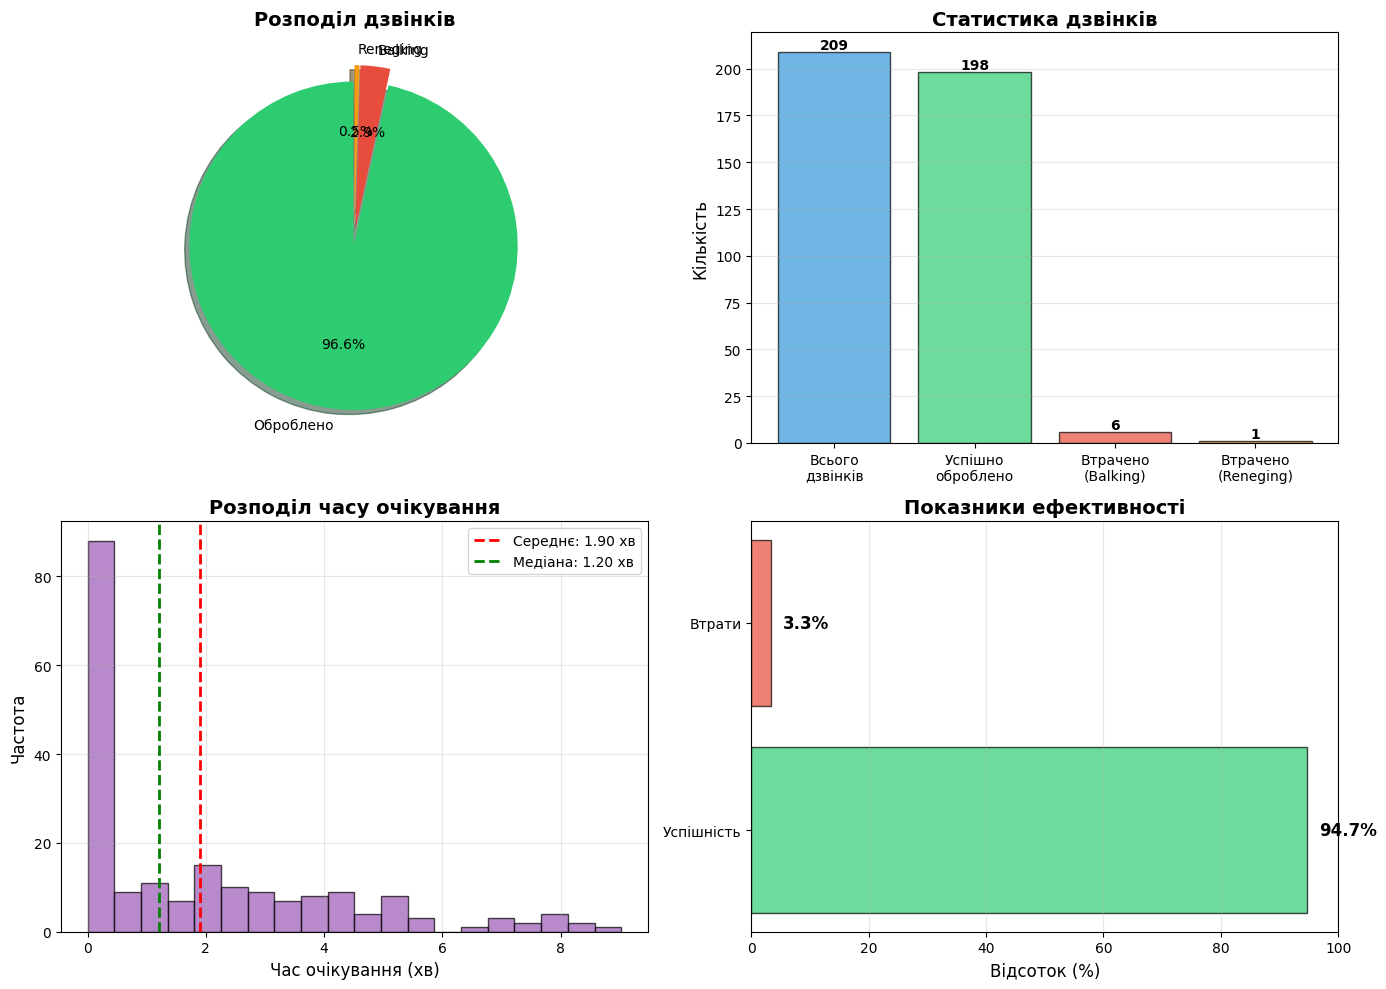

In [8]:
# –°—Ç–≤–æ—Ä—é—î–º–æ –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—é —Ä–µ–∑—É–ª—å—Ç–∞—Ç—ñ–≤
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. –†–æ–∑–ø–æ–¥—ñ–ª –¥–∑–≤—ñ–Ω–∫—ñ–≤ (pie chart)
labels = ['–û–±—Ä–æ–±–ª–µ–Ω–æ', 'Balking', 'Reneging']
sizes = [results.processed_calls, results.balked_calls, results.reneged_calls]
colors = ['#2ecc71', '#e74c3c', '#f39c12']
explode = (0.05, 0.05, 0.05)

axes[0, 0].pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
               shadow=True, startangle=90)
axes[0, 0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª –¥–∑–≤—ñ–Ω–∫—ñ–≤', fontsize=14, fontweight='bold')

# 2. –°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ —É –≤–∏–≥–ª—è–¥—ñ bar chart
categories = ['–í—Å—å–æ–≥–æ\n–¥–∑–≤—ñ–Ω–∫—ñ–≤', '–£—Å–ø—ñ—à–Ω–æ\n–æ–±—Ä–æ–±–ª–µ–Ω–æ', '–í—Ç—Ä–∞—á–µ–Ω–æ\n(Balking)', '–í—Ç—Ä–∞—á–µ–Ω–æ\n(Reneging)']
values = [results.total_calls, results.processed_calls, results.balked_calls, results.reneged_calls]
colors_bar = ['#3498db', '#2ecc71', '#e74c3c', '#f39c12']

bars = axes[0, 1].bar(categories, values, color=colors_bar, alpha=0.7, edgecolor='black')
axes[0, 1].set_title('–°—Ç–∞—Ç–∏—Å—Ç–∏–∫–∞ –¥–∑–≤—ñ–Ω–∫—ñ–≤', fontsize=14, fontweight='bold')
axes[0, 1].set_ylabel('–ö—ñ–ª—å–∫—ñ—Å—Ç—å', fontsize=12)
axes[0, 1].grid(axis='y', alpha=0.3)

# –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è –Ω–∞–¥ —Å—Ç–æ–≤–ø—Ü—è–º–∏
for bar in bars:
    height = bar.get_height()
    axes[0, 1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(height)}',
                    ha='center', va='bottom', fontweight='bold')

# 3. –ì—ñ—Å—Ç–æ–≥—Ä–∞–º–∞ —á–∞—Å—É –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è
if results.wait_times:
    axes[1, 0].hist(results.wait_times, bins=20, color='#9b59b6', alpha=0.7, edgecolor='black')
    axes[1, 0].axvline(statistics.mean(results.wait_times), color='red', 
                       linestyle='--', linewidth=2, label=f'–°–µ—Ä–µ–¥–Ω—î: {statistics.mean(results.wait_times):.2f} —Ö–≤')
    axes[1, 0].axvline(statistics.median(results.wait_times), color='green', 
                       linestyle='--', linewidth=2, label=f'–ú–µ–¥—ñ–∞–Ω–∞: {statistics.median(results.wait_times):.2f} —Ö–≤')
    axes[1, 0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª —á–∞—Å—É –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è', fontsize=14, fontweight='bold')
    axes[1, 0].set_xlabel('–ß–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)', fontsize=12)
    axes[1, 0].set_ylabel('–ß–∞—Å—Ç–æ—Ç–∞', fontsize=12)
    axes[1, 0].legend()
    axes[1, 0].grid(alpha=0.3)
else:
    axes[1, 0].text(0.5, 0.5, '–ù–µ–º–∞—î –¥–∞–Ω–∏—Ö –ø—Ä–æ —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è', 
                    ha='center', va='center', fontsize=12)
    axes[1, 0].set_title('–†–æ–∑–ø–æ–¥—ñ–ª —á–∞—Å—É –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è', fontsize=14, fontweight='bold')

# 4. –í—ñ–¥—Å–æ—Ç–∫–∏ –≤—Ç—Ä–∞—Ç
lost_percent = (results.balked_calls + results.reneged_calls) / results.total_calls * 100 if results.total_calls > 0 else 0
success_percent = results.processed_calls / results.total_calls * 100 if results.total_calls > 0 else 0

metrics = ['–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å', '–í—Ç—Ä–∞—Ç–∏']
percentages = [success_percent, lost_percent]
colors_metrics = ['#2ecc71', '#e74c3c']

bars2 = axes[1, 1].barh(metrics, percentages, color=colors_metrics, alpha=0.7, edgecolor='black')
axes[1, 1].set_title('–ü–æ–∫–∞–∑–Ω–∏–∫–∏ –µ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—ñ', fontsize=14, fontweight='bold')
axes[1, 1].set_xlabel('–í—ñ–¥—Å–æ—Ç–æ–∫ (%)', fontsize=12)
axes[1, 1].set_xlim(0, 100)
axes[1, 1].grid(axis='x', alpha=0.3)

# –î–æ–¥–∞—î–º–æ –≤—ñ–¥—Å–æ—Ç–∫–∏
for i, (bar, pct) in enumerate(zip(bars2, percentages)):
    axes[1, 1].text(pct + 2, bar.get_y() + bar.get_height()/2., 
                    f'{pct:.1f}%',
                    ha='left', va='center', fontweight='bold', fontsize=12)

plt.tight_layout()
plt.show()

## 8. –ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏ –∑ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º–∏

–î–∞–≤–∞–π—Ç–µ –ø—Ä–æ–≤–µ–¥–µ–º–æ –¥–µ–∫—ñ–ª—å–∫–∞ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤, –∑–º—ñ–Ω—é—é—á–∏ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ —Å–∏—Å—Ç–µ–º–∏, —â–æ–± –ø–æ–±–∞—á–∏—Ç–∏ —è–∫ –≤–æ–Ω–∏ –≤–ø–ª–∏–≤–∞—é—Ç—å –Ω–∞ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∏.

In [9]:
# –ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç: –Ø–∫ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ –≤–ø–ª–∏–≤–∞—î –Ω–∞ —è–∫—ñ—Å—Ç—å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è?

# –ó–±–µ—Ä—ñ–≥–∞—î–º–æ –æ—Ä–∏–≥—ñ–Ω–∞–ª—å–Ω—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏
original_operators = NUM_OPERATORS
original_verbose = VERBOSE

# –í–∏–º–∏–∫–∞—î–º–æ –¥–µ—Ç–∞–ª—å–Ω–∏–π –≤–∏–≤—ñ–¥ –¥–ª—è –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—ñ–≤
VERBOSE = False

# –¢–µ—Å—Ç—É—î–º–æ —Ä—ñ–∑–Ω—É –∫—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤
operator_counts = [2, 3, 4, 5]
experiment_results = []

print("–ü—Ä–æ–≤–æ–¥–∏–º–æ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏ –∑ —Ä—ñ–∑–Ω–æ—é –∫—ñ–ª—å–∫—ñ—Å—Ç—é –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤...\n")

for num_ops in operator_counts:
    NUM_OPERATORS = num_ops
    print(f"–ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç: {num_ops} –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤")
    result = run_simulation(seed=42)
    experiment_results.append(result)
    print()

# –í—ñ–¥–Ω–æ–≤–ª—é—î–º–æ –æ—Ä–∏–≥—ñ–Ω–∞–ª—å–Ω—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏
NUM_OPERATORS = original_operators
VERBOSE = original_verbose

–ü—Ä–æ–≤–æ–¥–∏–º–æ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç–∏ –∑ —Ä—ñ–∑–Ω–æ—é –∫—ñ–ª—å–∫—ñ—Å—Ç—é –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤...

–ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç: 2 –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤
–°–ò–ú–£–õ–Ø–¶–Ü–Ø –ö–û–õ-–¶–ï–ù–¢–†–£ –Ü–ù–¢–ï–†–ù–ï–¢-–ú–ê–ì–ê–ó–ò–ù–£

–ü–ê–†–ê–ú–ï–¢–†–ò:
  –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó: 480 —Ö–≤
  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: 2
  –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: 2.0 —Ö–≤
  –ß–∞—Å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è: 3.0-8.0 —Ö–≤
  –ú–∞–∫—Å. —Ä–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: 5
  –¢–µ—Ä–ø—ñ–Ω–Ω—è –∫–ª—ñ—î–Ω—Ç–∞: 10.0 —Ö–≤
  –î–µ—Ç–∞–ª—å–Ω–∏–π –≤–∏–≤—ñ–¥: –ù–Ü


–°–∏–º—É–ª—è—Ü—ñ—è –∑–∞–ø—É—â–µ–Ω–∞...

 –∑–∞–≤–µ—Ä—à–µ–Ω–æ!
–†–ï–ó–£–õ–¨–¢–ê–¢–ò –°–ò–ú–£–õ–Ø–¶–Ü–á

–ó–ê–ì–ê–õ–¨–ù–ê –°–¢–ê–¢–ò–°–¢–ò–ö–ê:
  –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤: 224
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 165
  –í—Ç—Ä–∞—á–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤: 54

–í–Ü–î–ú–û–í–ò:
  Balking (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞): 26 (11.6%)
  Reneging (–≤–∏–π—à–ª–∏ –∑ —á–µ—Ä–≥–∏): 28 (12.5%)
  –ó–ê–ì–ê–õ–¨–ù–ò–ô % –≤—Ç—Ä–∞—á–µ–Ω–∏—Ö: 24.1%

–û–ë–°–õ–£–ì–û–í–£–í–ê–ù–ù–Ø:
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 165 (73.7%)

–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø (–¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤):
  –°–µ—Ä–µ–¥–Ω—ñ–π: 5.01 —Ö–≤
  –ú–µ–¥—ñ–∞–Ω–∞: 5.14 —Ö–≤
  –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π: 0.00 —Ö–≤
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π: 9.98 —Ö–≤

–ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç: 3 –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤
–°–ò–ú–£–õ–Ø–¶–Ü–Ø –ö–û–õ-–¶–ï–ù–¢–†–£ –Ü–ù–¢–ï–†–ù–ï–¢-–ú–ê–ì–ê–ó–ò–ù–£

–ü–ê–†–ê–ú–ï–¢–†–ò:
  –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó: 480 —Ö–≤
  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: 3
  –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏:

 –∑–∞–≤–µ—Ä—à–µ–Ω–æ!
–†–ï–ó–£–õ–¨–¢–ê–¢–ò –°–ò–ú–£–õ–Ø–¶–Ü–á

–ó–ê–ì–ê–õ–¨–ù–ê –°–¢–ê–¢–ò–°–¢–ò–ö–ê:
  –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤: 209
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 198
  –í—Ç—Ä–∞—á–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤: 7

–í–Ü–î–ú–û–í–ò:
  Balking (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞): 6 (2.9%)
  Reneging (–≤–∏–π—à–ª–∏ –∑ —á–µ—Ä–≥–∏): 1 (0.5%)
  –ó–ê–ì–ê–õ–¨–ù–ò–ô % –≤—Ç—Ä–∞—á–µ–Ω–∏—Ö: 3.3%

–û–ë–°–õ–£–ì–û–í–£–í–ê–ù–ù–Ø:
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 198 (94.7%)

–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø (–¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤):
  –°–µ—Ä–µ–¥–Ω—ñ–π: 1.90 —Ö–≤
  –ú–µ–¥—ñ–∞–Ω–∞: 1.20 —Ö–≤
  –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π: 0.00 —Ö–≤
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π: 9.02 —Ö–≤

–ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç: 4 –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤
–°–ò–ú–£–õ–Ø–¶–Ü–Ø –ö–û–õ-–¶–ï–ù–¢–†–£ –Ü–ù–¢–ï–†–ù–ï–¢-–ú–ê–ì–ê–ó–ò–ù–£

–ü–ê–†–ê–ú–ï–¢–†–ò:
  –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó: 480 —Ö–≤
  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: 4
  –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: 2.0 —

 –∑–∞–≤–µ—Ä—à–µ–Ω–æ!
–†–ï–ó–£–õ–¨–¢–ê–¢–ò –°–ò–ú–£–õ–Ø–¶–Ü–á

–ó–ê–ì–ê–õ–¨–ù–ê –°–¢–ê–¢–ò–°–¢–ò–ö–ê:
  –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤: 223
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 219
  –í—Ç—Ä–∞—á–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤: 1

–í–Ü–î–ú–û–í–ò:
  Balking (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞): 1 (0.4%)
  Reneging (–≤–∏–π—à–ª–∏ –∑ —á–µ—Ä–≥–∏): 0 (0.0%)
  –ó–ê–ì–ê–õ–¨–ù–ò–ô % –≤—Ç—Ä–∞—á–µ–Ω–∏—Ö: 0.4%

–û–ë–°–õ–£–ì–û–í–£–í–ê–ù–ù–Ø:
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 219 (98.2%)

–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø (–¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤):
  –°–µ—Ä–µ–¥–Ω—ñ–π: 0.67 —Ö–≤
  –ú–µ–¥—ñ–∞–Ω–∞: 0.00 —Ö–≤
  –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π: 0.00 —Ö–≤
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π: 7.78 —Ö–≤

–ï–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç: 5 –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤
–°–ò–ú–£–õ–Ø–¶–Ü–Ø –ö–û–õ-–¶–ï–ù–¢–†–£ –Ü–ù–¢–ï–†–ù–ï–¢-–ú–ê–ì–ê–ó–ò–ù–£

–ü–ê–†–ê–ú–ï–¢–†–ò:
  –ß–∞—Å —Å–∏–º—É–ª—è—Ü—ñ—ó: 480 —Ö–≤
  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: 5
  –°–µ—Ä–µ–¥–Ω—ñ–π —ñ–Ω—Ç–µ—Ä–≤–∞–ª –º—ñ–∂ –¥–∑–≤—ñ–Ω–∫–∞–º–∏: 2.0 —

 –∑–∞–≤–µ—Ä—à–µ–Ω–æ!
–†–ï–ó–£–õ–¨–¢–ê–¢–ò –°–ò–ú–£–õ–Ø–¶–Ü–á

–ó–ê–ì–ê–õ–¨–ù–ê –°–¢–ê–¢–ò–°–¢–ò–ö–ê:
  –ó–∞–≥–∞–ª—å–Ω–∞ –∫—ñ–ª—å–∫—ñ—Å—Ç—å –¥–∑–≤—ñ–Ω–∫—ñ–≤: 240
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 238
  –í—Ç—Ä–∞—á–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤: 0

–í–Ü–î–ú–û–í–ò:
  Balking (—á–µ—Ä–≥–∞ –ø–µ—Ä–µ–ø–æ–≤–Ω–µ–Ω–∞): 0 (0.0%)
  Reneging (–≤–∏–π—à–ª–∏ –∑ —á–µ—Ä–≥–∏): 0 (0.0%)
  –ó–ê–ì–ê–õ–¨–ù–ò–ô % –≤—Ç—Ä–∞—á–µ–Ω–∏—Ö: 0.0%

–û–ë–°–õ–£–ì–û–í–£–í–ê–ù–ù–Ø:
  –£—Å–ø—ñ—à–Ω–æ –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö: 238 (99.2%)

–ß–ê–° –û–ß–Ü–ö–£–í–ê–ù–ù–Ø (–¥–ª—è –æ–±—Ä–æ–±–ª–µ–Ω–∏—Ö –¥–∑–≤—ñ–Ω–∫—ñ–≤):
  –°–µ—Ä–µ–¥–Ω—ñ–π: 0.27 —Ö–≤
  –ú–µ–¥—ñ–∞–Ω–∞: 0.00 —Ö–≤
  –ú—ñ–Ω—ñ–º–∞–ª—å–Ω–∏–π: 0.00 —Ö–≤
  –ú–∞–∫—Å–∏–º–∞–ª—å–Ω–∏–π: 4.94 —Ö–≤



## 9. –ó–í–û–†–û–¢–ù–ê –ó–ê–î–ê–ß–ê: –ü—ñ–¥–±—ñ—Ä –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è Balking < 3%

**–ü—Ä—è–º–∞ –∑–∞–¥–∞—á–∞** (—â–æ –º–∏ —Ä–æ–±–∏–ª–∏ —Ä–∞–Ω—ñ—à–µ):
- –ó–∞–¥–∞—î–º–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ (–æ–ø–µ—Ä–∞—Ç–æ—Ä–∏, —á–µ—Ä–≥–∞) ‚Üí –¥–∏–≤–∏–º–æ—Å—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç (–±–∞–ª–∫—ñ–Ω–≥ %)

**–ó–≤–æ—Ä–æ—Ç–Ω–∞ –∑–∞–¥–∞—á–∞** (—â–æ —Ä–æ–±–∏–º–æ –∑–∞—Ä–∞–∑):
- –ó–∞–¥–∞—î–º–æ –≤–∏–º–æ–≥—É (–±–∞–ª–∫—ñ–Ω–≥ < 2%) ‚Üí —à—É–∫–∞—î–º–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏ (—Å–∫—ñ–ª—å–∫–∏ –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ —ñ —è–∫–∞ —á–µ—Ä–≥–∞)

### –ú–µ—Ç–∞ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É:
–ó–Ω–∞–π—Ç–∏ **–º—ñ–Ω—ñ–º–∞–ª—å–Ω—É** –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—é –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ —ñ —Ä–æ–∑–º—ñ—Ä—É —á–µ—Ä–≥–∏, –ø—Ä–∏ —è–∫—ñ–π **Balking –≤—ñ–¥–º–æ–≤–∏ < 2%**

In [12]:
# –§—É–Ω–∫—Ü—ñ—è –¥–ª—è —à–≤–∏–¥–∫–æ–≥–æ –∑–∞–ø—É—Å–∫—É —Å–∏–º—É–ª—è—Ü—ñ—ó –±–µ–∑ –≤–∏–≤–æ–¥—É
def quick_sim(num_operators, queue_size, seed=42):
    """–®–≤–∏–¥–∫–∞ —Å–∏–º—É–ª—è—Ü—ñ—è –±–µ–∑ –≤–∏–≤–æ–¥—É –¥–ª—è –ø–æ—à—É–∫—É –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤"""
    global NUM_OPERATORS, MAX_QUEUE_SIZE, VERBOSE
    
    NUM_OPERATORS = num_operators
    MAX_QUEUE_SIZE = queue_size
    VERBOSE = False
    
    stats.reset()
    random.seed(seed)
    env = simpy.Environment()
    operators = simpy.Resource(env, capacity=NUM_OPERATORS)
    env.process(setup(env, operators))
    env.run(until=SIM_DURATION)
    
    if stats.total_calls == 0:
        return None
    
    balked_pct = (stats.balked_calls / stats.total_calls * 100)
    
    return {
        'operators': num_operators,
        'queue_size': queue_size,
        'total_calls': stats.total_calls,
        'balked': stats.balked_calls,
        'balked_pct': balked_pct,
        'reneged': stats.reneged_calls,
        'reneged_pct': (stats.reneged_calls / stats.total_calls * 100),
        'processed': stats.processed_calls,
        'avg_wait': statistics.mean(stats.wait_times) if stats.wait_times else 0
    }

print("–§—É–Ω–∫—Ü—ñ—è quick_sim —Å—Ç–≤–æ—Ä–µ–Ω–∞")

–§—É–Ω–∫—Ü—ñ—è quick_sim —Å—Ç–≤–æ—Ä–µ–Ω–∞


In [13]:
print("=" * 70)
print("–ó–í–û–†–û–¢–ù–ê –ó–ê–î–ê–ß–ê: –ü–æ—à—É–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è Balking < 3%")
print("=" * 70)
print()

# –¶—ñ–ª—å–æ–≤–µ –æ–±–º–µ–∂–µ–Ω–Ω—è
TARGET_BALKING = 2.0

print(f"–í–∏–º–æ–≥–∞: Balking –≤—ñ–¥–º–æ–≤–∏ < {TARGET_BALKING}%")
print("–ü–æ—à—É–∫ –º—ñ–Ω—ñ–º–∞–ª—å–Ω–æ—ó –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó...\n")

# –ü–µ—Ä–µ–±–∏—Ä–∞—î–º–æ —Ä—ñ–∑–Ω—ñ –∫–æ–º–±—ñ–Ω–∞—Ü—ñ—ó
valid_configs = []

for operators in range(1, 8):
    for queue_size in range(3, 15):
        result = quick_sim(operators, queue_size)
        
        if result and result['balked_pct'] < TARGET_BALKING:
            # –†–∞—Ö—É—î–º–æ "–≤–∞—Ä—Ç—ñ—Å—Ç—å" –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó
            cost = operators + queue_size * 0.1  # –û–ø–µ—Ä–∞—Ç–æ—Ä–∏ –≤–∞–∂–ª–∏–≤—ñ—à—ñ
            result['cost'] = cost
            valid_configs.append(result)

# –°–æ—Ä—Ç—É—î–º–æ –∑–∞ –≤–∞—Ä—Ç—ñ—Å—Ç—é (–º—ñ–Ω—ñ–º—É–º —Ä–µ—Å—É—Ä—Å—ñ–≤)
valid_configs.sort(key=lambda x: (x['cost'], x['operators']))

if valid_configs:
    print(f"‚úì –ó–Ω–∞–π–¥–µ–Ω–æ {len(valid_configs)} –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π –∑ Balking < {TARGET_BALKING}%\n")
    
    # –ü–æ–∫–∞–∑—É—î–º–æ —Ç–æ–ø-10
    print("–¢–æ–ø-10 –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π:\n")
    print(f"{'‚Ññ':<4} {'–û–ø–µ—Ä–∞—Ç–æ—Ä–∏':<10} {'–ß–µ—Ä–≥–∞':<8} {'Balking':<12} {'Reneging':<12} {'–ß–∞—Å –æ—á—ñ–∫.':<12}")
    print("-" * 70)
    
    for i, cfg in enumerate(valid_configs[:10], 1):
        print(f"{i:<4} {cfg['operators']:<10} {cfg['queue_size']:<8} "
              f"{cfg['balked']} ({cfg['balked_pct']:.2f}%){'':<3} "
              f"{cfg['reneged']} ({cfg['reneged_pct']:.2f}%){'':<3} "
              f"{cfg['avg_wait']:.2f} —Ö–≤")
    
    # –ù–∞–π–∫—Ä–∞—â–µ —Ä—ñ—à–µ–Ω–Ω—è
    best = valid_configs[0]
    print(f"\n{'='*70}")
    print("–û–ü–¢–ò–ú–ê–õ–¨–ù–ê –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–Ø:")
    print(f"{'='*70}")
    print(f"  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: {best['operators']}")
    print(f"  –†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: {best['queue_size']}")
    print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:")
    print(f"  –ó–∞–≥–∞–ª–æ–º –¥–∑–≤—ñ–Ω–∫—ñ–≤: {best['total_calls']}")
    print(f"  –û–±—Ä–æ–±–ª–µ–Ω–æ: {best['processed']} ({best['processed']/best['total_calls']*100:.1f}%)")
    print(f"  Balking –≤—ñ–¥–º–æ–≤–∏: {best['balked']} ({best['balked_pct']:.2f}%) ‚úì < {TARGET_BALKING}%")
    print(f"  Reneging –≤—ñ–¥–º–æ–≤–∏: {best['reneged']} ({best['reneged_pct']:.2f}%)")
    print(f"  –°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è: {best['avg_wait']:.2f} —Ö–≤")
    print(f"  –£–º–æ–≤–Ω–∞ –≤–∞—Ä—Ç—ñ—Å—Ç—å: {best['cost']:.1f}")
    print(f"{'='*70}")
    
    # –ó–±–µ—Ä—ñ–≥–∞—î–º–æ –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó
    best_config = best
else:
    print(f"‚ö†Ô∏è –ù–µ –∑–Ω–∞–π–¥–µ–Ω–æ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π –∑ Balking < {TARGET_BALKING}%")
    print("–°–ø—Ä–æ–±—É–π—Ç–µ –∑–±—ñ–ª—å—à–∏—Ç–∏ –¥—ñ–∞–ø–∞–∑–æ–Ω –ø–æ—à—É–∫—É")

–ó–í–û–†–û–¢–ù–ê –ó–ê–î–ê–ß–ê: –ü–æ—à—É–∫ –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤ –¥–ª—è Balking < 3%

–í–∏–º–æ–≥–∞: Balking –≤—ñ–¥–º–æ–≤–∏ < 2.0%
–ü–æ—à—É–∫ –º—ñ–Ω—ñ–º–∞–ª—å–Ω–æ—ó –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó...

‚úì –ó–Ω–∞–π–¥–µ–Ω–æ 69 –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π –∑ Balking < 2.0%

–¢–æ–ø-10 –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π:

‚Ññ    –û–ø–µ—Ä–∞—Ç–æ—Ä–∏  –ß–µ—Ä–≥–∞    Balking      Reneging     –ß–∞—Å –æ—á—ñ–∫.   
----------------------------------------------------------------------
1    1          10       4 (1.77%)    133 (58.85%)    7.27 —Ö–≤
2    1          11       2 (0.88%)    135 (59.73%)    7.27 —Ö–≤
3    1          12       1 (0.44%)    136 (60.18%)    7.27 —Ö–≤
4    1          13       0 (0.00%)    137 (60.62%)    7.27 —Ö–≤
5    1          14       0 (0.00%)    137 (60.62%)    7.27 —Ö–≤
6    2          8        2 (0.90%)    46 (20.63%)    5.85 —Ö–≤
7    2          9        0 (0.00%)    48 (21.52%)    5.85 —Ö–≤
8    2          10       0 (0.00%)    48 (21.52%)    5.85 —Ö–≤
9    2        

### –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –∑–≤–æ—Ä–æ—Ç–Ω–æ—ó –∑–∞–¥–∞—á—ñ

–ü–æ—Ä—ñ–≤–Ω—è—î–º–æ –ø–æ—á–∞—Ç–∫–æ–≤—É –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—é –∑ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ—é.

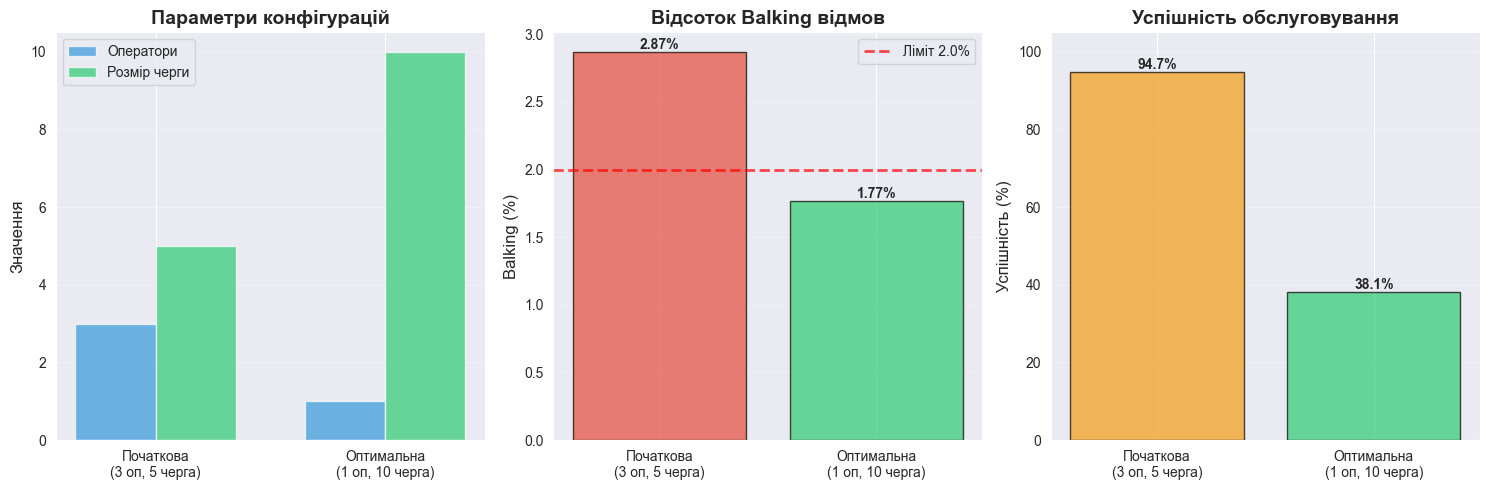


–ü–û–†–Ü–í–ù–Ø–ù–ù–Ø –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–ô

–ü–∞—Ä–∞–º–µ—Ç—Ä                       –ü–æ—á–∞—Ç–∫–æ–≤–∞            –û–ø—Ç–∏–º–∞–ª—å–Ω–∞          
----------------------------------------------------------------------
–û–ø–µ—Ä–∞—Ç–æ—Ä–∏                      3                    1                   
–†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏                   5                    10                  
Balking –≤—ñ–¥–º–æ–≤–∏ (%)            2.87%                 1.77%
Reneging –≤—ñ–¥–º–æ–≤–∏ (%)           0.48%                 58.85%
–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å (%)                 94.7%                 38.1%
–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)   1.90                   7.27

üí° –í–ò–°–ù–û–í–û–ö:
   –û–ø—Ç–∏–º–∞–ª—å–Ω–∞ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—è –∑–º–µ–Ω—à–∏–ª–∞ Balking –Ω–∞ 1.10%
   –ó 2.87% –¥–æ 1.77% ‚úì
   –ü–æ—Ç—Ä—ñ–±–Ω–æ: 1 –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ —Ç–∞ —á–µ—Ä–≥–∞ —Ä–æ–∑–º—ñ—Ä–æ–º 10


In [14]:
# –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –ø–æ—á–∞—Ç–∫–æ–≤–æ—ó —Ç–∞ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ—ó –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó
try:
    # –ü–æ—á–∞—Ç–∫–æ–≤–∞ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—è (–∑ –ø–æ—á–∞—Ç–∫—É notebook)
    initial = quick_sim(3, 5)  # –ü–æ—á–∞—Ç–∫–æ–≤—ñ –ø–∞—Ä–∞–º–µ—Ç—Ä–∏
    optimal = best_config
    
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    
    # 1. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    configs = ['–ü–æ—á–∞—Ç–∫–æ–≤–∞\n(3 –æ–ø, 5 —á–µ—Ä–≥–∞)', f'–û–ø—Ç–∏–º–∞–ª—å–Ω–∞\n({optimal["operators"]} –æ–ø, {optimal["queue_size"]} —á–µ—Ä–≥–∞)']
    operators_data = [initial['operators'], optimal['operators']]
    queue_data = [initial['queue_size'], optimal['queue_size']]
    
    x = np.arange(len(configs))
    width = 0.35
    
    axes[0].bar(x - width/2, operators_data, width, label='–û–ø–µ—Ä–∞—Ç–æ—Ä–∏', color='#3498db', alpha=0.7)
    axes[0].bar(x + width/2, queue_data, width, label='–†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏', color='#2ecc71', alpha=0.7)
    axes[0].set_ylabel('–ó–Ω–∞—á–µ–Ω–Ω—è', fontsize=12)
    axes[0].set_title('–ü–∞—Ä–∞–º–µ—Ç—Ä–∏ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π', fontsize=14, fontweight='bold')
    axes[0].set_xticks(x)
    axes[0].set_xticklabels(configs)
    axes[0].legend()
    axes[0].grid(axis='y', alpha=0.3)
    
    # 2. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è Balking –≤—ñ–¥–º–æ–≤
    balking_data = [initial['balked_pct'], optimal['balked_pct']]
    colors = ['#e74c3c' if b >= TARGET_BALKING else '#2ecc71' for b in balking_data]
    
    bars = axes[1].bar(configs, balking_data, color=colors, alpha=0.7, edgecolor='black')
    axes[1].axhline(y=TARGET_BALKING, color='red', linestyle='--', linewidth=2, 
                    label=f'–õ—ñ–º—ñ—Ç {TARGET_BALKING}%', alpha=0.7)
    axes[1].set_ylabel('Balking (%)', fontsize=12)
    axes[1].set_title('–í—ñ–¥—Å–æ—Ç–æ–∫ Balking –≤—ñ–¥–º–æ–≤', fontsize=14, fontweight='bold')
    axes[1].legend()
    axes[1].grid(axis='y', alpha=0.3)
    
    # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
    for bar in bars:
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.2f}%',
                    ha='center', va='bottom', fontweight='bold')
    
    # 3. –£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è
    success_data = [
        initial['processed'] / initial['total_calls'] * 100,
        optimal['processed'] / optimal['total_calls'] * 100
    ]
    
    bars2 = axes[2].bar(configs, success_data, color=['#f39c12', '#2ecc71'], alpha=0.7, edgecolor='black')
    axes[2].set_ylabel('–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å (%)', fontsize=12)
    axes[2].set_title('–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è', fontsize=14, fontweight='bold')
    axes[2].set_ylim(0, 105)
    axes[2].grid(axis='y', alpha=0.3)
    
    # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
    for bar in bars2:
        height = bar.get_height()
        axes[2].text(bar.get_x() + bar.get_width()/2., height,
                    f'{height:.1f}%',
                    ha='center', va='bottom', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # –ó–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è
    print("\n" + "=" * 70)
    print("–ü–û–†–Ü–í–ù–Ø–ù–ù–Ø –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–ô")
    print("=" * 70)
    print(f"\n{'–ü–∞—Ä–∞–º–µ—Ç—Ä':<30} {'–ü–æ—á–∞—Ç–∫–æ–≤–∞':<20} {'–û–ø—Ç–∏–º–∞–ª—å–Ω–∞':<20}")
    print("-" * 70)
    print(f"{'–û–ø–µ—Ä–∞—Ç–æ—Ä–∏':<30} {initial['operators']:<20} {optimal['operators']:<20}")
    print(f"{'–†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏':<30} {initial['queue_size']:<20} {optimal['queue_size']:<20}")
    print(f"{'Balking –≤—ñ–¥–º–æ–≤–∏ (%)':<30} {initial['balked_pct']:.2f}%{'':<16} {optimal['balked_pct']:.2f}%")
    print(f"{'Reneging –≤—ñ–¥–º–æ–≤–∏ (%)':<30} {initial['reneged_pct']:.2f}%{'':<16} {optimal['reneged_pct']:.2f}%")
    print(f"{'–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å (%)':<30} {success_data[0]:.1f}%{'':<16} {success_data[1]:.1f}%")
    print(f"{'–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)':<30} {initial['avg_wait']:.2f}{'':<18} {optimal['avg_wait']:.2f}")
    print("=" * 70)
    
    # –í–∏—Å–Ω–æ–≤–æ–∫
    print("\nüí° –í–ò–°–ù–û–í–û–ö:")
    if optimal['balked_pct'] < initial['balked_pct']:
        diff = initial['balked_pct'] - optimal['balked_pct']
        print(f"   –û–ø—Ç–∏–º–∞–ª—å–Ω–∞ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—è –∑–º–µ–Ω—à–∏–ª–∞ Balking –Ω–∞ {diff:.2f}%")
        print(f"   –ó {initial['balked_pct']:.2f}% –¥–æ {optimal['balked_pct']:.2f}% ‚úì")
    print(f"   –ü–æ—Ç—Ä—ñ–±–Ω–æ: {optimal['operators']} –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ —Ç–∞ —á–µ—Ä–≥–∞ —Ä–æ–∑–º—ñ—Ä–æ–º {optimal['queue_size']}")
    
except Exception as e:
    print(f"‚ö†Ô∏è –ü–æ–º–∏–ª–∫–∞ –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó: {e}")

## 10. –ó–í–û–†–û–¢–ù–ê –ó–ê–î–ê–ß–ê –ó –ü–û–î–í–Ü–ô–ù–ò–ú –û–ë–ú–ï–ñ–ï–ù–ù–Ø–ú: Balking < 2% –¢–ê Reneging < 5%

**–ü–æ–ø–µ—Ä–µ–¥–Ω—ñ–π –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç** –ø–æ–∫–∞–∑–∞–≤, —â–æ –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—è —Ç—ñ–ª—å–∫–∏ –∑–∞ Balking –ø—Ä–∏–∑–≤–æ–¥–∏—Ç—å –¥–æ –≤–∏—Å–æ–∫–æ–≥–æ —Ä—ñ–≤–Ω—è Reneging (58.85%).

**–ù–æ–≤–∏–π –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç:**
- –ó–Ω–∞–π—Ç–∏ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—é –∑ **–ü–û–î–í–Ü–ô–ù–ò–ú –æ–±–º–µ–∂–µ–Ω–Ω—è–º**:
  - Balking < 2%
  - Reneging < 5%

–¶–µ –±—ñ–ª—å—à —Ä–µ–∞–ª—ñ—Å—Ç–∏—á–Ω–∞ –≤–∏–º–æ–≥–∞ –¥–ª—è –∫–æ–ª-—Ü–µ–Ω—Ç—Ä—É, –¥–µ –≤–∞–∂–ª–∏–≤–æ –º—ñ–Ω—ñ–º—ñ–∑—É–≤–∞—Ç–∏ –û–ë–ê —Ç–∏–ø–∏ –≤—Ç—Ä–∞—Ç.

In [15]:
print("=" * 70)
print("–ó–í–û–†–û–¢–ù–ê –ó–ê–î–ê–ß–ê: –ü–æ–¥–≤—ñ–π–Ω–µ –æ–±–º–µ–∂–µ–Ω–Ω—è (Balking < 2% –¢–ê Reneging < 5%)")
print("=" * 70)
print()

# –¶—ñ–ª—å–æ–≤—ñ –æ–±–º–µ–∂–µ–Ω–Ω—è
TARGET_BALKING = 2.0
TARGET_RENEGING = 5.0

print(f"–í–∏–º–æ–≥–∏:")
print(f"  - Balking –≤—ñ–¥–º–æ–≤–∏ < {TARGET_BALKING}%")
print(f"  - Reneging –≤—ñ–¥–º–æ–≤–∏ < {TARGET_RENEGING}%")
print("–ü–æ—à—É–∫ –º—ñ–Ω—ñ–º–∞–ª—å–Ω–æ—ó –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó...\n")

# –ü–µ—Ä–µ–±–∏—Ä–∞—î–º–æ —Ä—ñ–∑–Ω—ñ –∫–æ–º–±—ñ–Ω–∞—Ü—ñ—ó
valid_dual_configs = []

for operators in range(1, 10):
    for queue_size in range(3, 20):
        result = quick_sim(operators, queue_size)
        
        # –ü–û–î–í–Ü–ô–ù–ê –ø–µ—Ä–µ–≤—ñ—Ä–∫–∞: –Ü balking, –Ü reneging –º–∞—é—Ç—å –±—É—Ç–∏ < –ø–æ—Ä–æ–≥—ñ–≤
        if result and result['balked_pct'] < TARGET_BALKING and result['reneged_pct'] < TARGET_RENEGING:
            # –†–∞—Ö—É—î–º–æ "–≤–∞—Ä—Ç—ñ—Å—Ç—å" –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó
            cost = operators + queue_size * 0.1  # –û–ø–µ—Ä–∞—Ç–æ—Ä–∏ –≤–∞–∂–ª–∏–≤—ñ—à—ñ
            result['cost'] = cost
            valid_dual_configs.append(result)

# –°–æ—Ä—Ç—É—î–º–æ –∑–∞ –≤–∞—Ä—Ç—ñ—Å—Ç—é (–º—ñ–Ω—ñ–º—É–º —Ä–µ—Å—É—Ä—Å—ñ–≤)
valid_dual_configs.sort(key=lambda x: (x['cost'], x['operators']))

if valid_dual_configs:
    print(f"‚úì –ó–Ω–∞–π–¥–µ–Ω–æ {len(valid_dual_configs)} –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π –∑ –ü–û–î–í–Ü–ô–ù–ò–ú –æ–±–º–µ–∂–µ–Ω–Ω—è–º\n")
    
    # –ü–æ–∫–∞–∑—É—î–º–æ —Ç–æ–ø-10
    print("–¢–æ–ø-10 –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π:\n")
    print(f"{'‚Ññ':<4} {'–û–ø–µ—Ä–∞—Ç–æ—Ä–∏':<10} {'–ß–µ—Ä–≥–∞':<8} {'Balking':<15} {'Reneging':<15} {'–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å':<12} {'–ß–∞—Å –æ—á—ñ–∫.'}")
    print("-" * 85)
    
    for i, cfg in enumerate(valid_dual_configs[:10], 1):
        success_pct = (cfg['processed'] / cfg['total_calls'] * 100)
        print(f"{i:<4} {cfg['operators']:<10} {cfg['queue_size']:<8} "
              f"{cfg['balked']} ({cfg['balked_pct']:.2f}%){'':<6} "
              f"{cfg['reneged']} ({cfg['reneged_pct']:.2f}%){'':<6} "
              f"{success_pct:.1f}%{'':<7} "
              f"{cfg['avg_wait']:.2f} —Ö–≤")
    
    # –ù–∞–π–∫—Ä–∞—â–µ —Ä—ñ—à–µ–Ω–Ω—è
    best_dual = valid_dual_configs[0]
    print(f"\n{'='*85}")
    print("–û–ü–¢–ò–ú–ê–õ–¨–ù–ê –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–Ø –ó –ü–û–î–í–Ü–ô–ù–ò–ú –û–ë–ú–ï–ñ–ï–ù–ù–Ø–ú:")
    print(f"{'='*85}")
    print(f"  –ö—ñ–ª—å–∫—ñ—Å—Ç—å –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤: {best_dual['operators']}")
    print(f"  –†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏: {best_dual['queue_size']}")
    print(f"\n–†–µ–∑—É–ª—å—Ç–∞—Ç–∏:")
    print(f"  –ó–∞–≥–∞–ª–æ–º –¥–∑–≤—ñ–Ω–∫—ñ–≤: {best_dual['total_calls']}")
    print(f"  –û–±—Ä–æ–±–ª–µ–Ω–æ: {best_dual['processed']} ({best_dual['processed']/best_dual['total_calls']*100:.1f}%)")
    print(f"  Balking –≤—ñ–¥–º–æ–≤–∏: {best_dual['balked']} ({best_dual['balked_pct']:.2f}%) ‚úì < {TARGET_BALKING}%")
    print(f"  Reneging –≤—ñ–¥–º–æ–≤–∏: {best_dual['reneged']} ({best_dual['reneged_pct']:.2f}%) ‚úì < {TARGET_RENEGING}%")
    print(f"  –ó–ê–ì–ê–õ–¨–ù–Ü –≤—Ç—Ä–∞—Ç–∏: {best_dual['balked'] + best_dual['reneged']} ({(best_dual['balked_pct'] + best_dual['reneged_pct']):.2f}%)")
    print(f"  –°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è: {best_dual['avg_wait']:.2f} —Ö–≤")
    print(f"  –£–º–æ–≤–Ω–∞ –≤–∞—Ä—Ç—ñ—Å—Ç—å: {best_dual['cost']:.1f}")
    print(f"{'='*85}")
    
    # –ó–±–µ—Ä—ñ–≥–∞—î–º–æ –¥–ª—è –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—ó
    best_dual_config = best_dual
else:
    print(f"‚ö†Ô∏è –ù–µ –∑–Ω–∞–π–¥–µ–Ω–æ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π –∑ Balking < {TARGET_BALKING}% –¢–ê Reneging < {TARGET_RENEGING}%")
    print("–°–ø—Ä–æ–±—É–π—Ç–µ:")
    print("  - –ó–±—ñ–ª—å—à–∏—Ç–∏ –¥—ñ–∞–ø–∞–∑–æ–Ω –ø–æ—à—É–∫—É (–±—ñ–ª—å—à–µ –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ –∞–±–æ –±—ñ–ª—å—à–∞ —á–µ—Ä–≥–∞)")
    print("  - –ü–æ—Å–ª–∞–±–∏—Ç–∏ –æ–±–º–µ–∂–µ–Ω–Ω—è")
    best_dual_config = None

–ó–í–û–†–û–¢–ù–ê –ó–ê–î–ê–ß–ê: –ü–æ–¥–≤—ñ–π–Ω–µ –æ–±–º–µ–∂–µ–Ω–Ω—è (Balking < 2% –¢–ê Reneging < 5%)

–í–∏–º–æ–≥–∏:
  - Balking –≤—ñ–¥–º–æ–≤–∏ < 2.0%
  - Reneging –≤—ñ–¥–º–æ–≤–∏ < 5.0%
–ü–æ—à—É–∫ –º—ñ–Ω—ñ–º–∞–ª—å–Ω–æ—ó –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó...

‚úì –ó–Ω–∞–π–¥–µ–Ω–æ 116 –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π –∑ –ü–û–î–í–Ü–ô–ù–ò–ú –æ–±–º–µ–∂–µ–Ω–Ω—è–º

–¢–æ–ø-10 –æ–ø—Ç–∏–º–∞–ª—å–Ω–∏—Ö –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π:

‚Ññ    –û–ø–µ—Ä–∞—Ç–æ—Ä–∏  –ß–µ—Ä–≥–∞    Balking         Reneging        –£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å   –ß–∞—Å –æ—á—ñ–∫.
-------------------------------------------------------------------------------------
1    3          6        3 (1.41%)       2 (0.94%)       94.8%        2.05 —Ö–≤
2    3          7        1 (0.47%)       4 (1.88%)       94.8%        2.05 —Ö–≤
3    3          8        0 (0.00%)       5 (2.35%)       94.8%        2.05 —Ö–≤
4    3          9        0 (0.00%)       5 (2.35%)       94.8%        2.05 —Ö–≤
5    3          10       0 (0.00%)       5 (2.35%)       94.8%        2.05 —Ö–≤

### –í—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è —Ç—Ä—å–æ—Ö –ø—ñ–¥—Ö–æ–¥—ñ–≤

–ü–æ—Ä—ñ–≤–Ω—è—î–º–æ —Ç—Ä–∏ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó:
1. **–ü–æ—á–∞—Ç–∫–æ–≤–∞** (3 –æ–ø–µ—Ä–∞—Ç–æ—Ä–∏, —á–µ—Ä–≥–∞ 5)
2. **–û–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—è —Ç—ñ–ª—å–∫–∏ –ø–æ Balking** (1 –æ–ø–µ—Ä–∞—Ç–æ—Ä, —á–µ—Ä–≥–∞ 10)
3. **–ü–æ–¥–≤—ñ–π–Ω–∞ –æ–ø—Ç–∏–º—ñ–∑–∞—Ü—ñ—è** (Balking + Reneging)

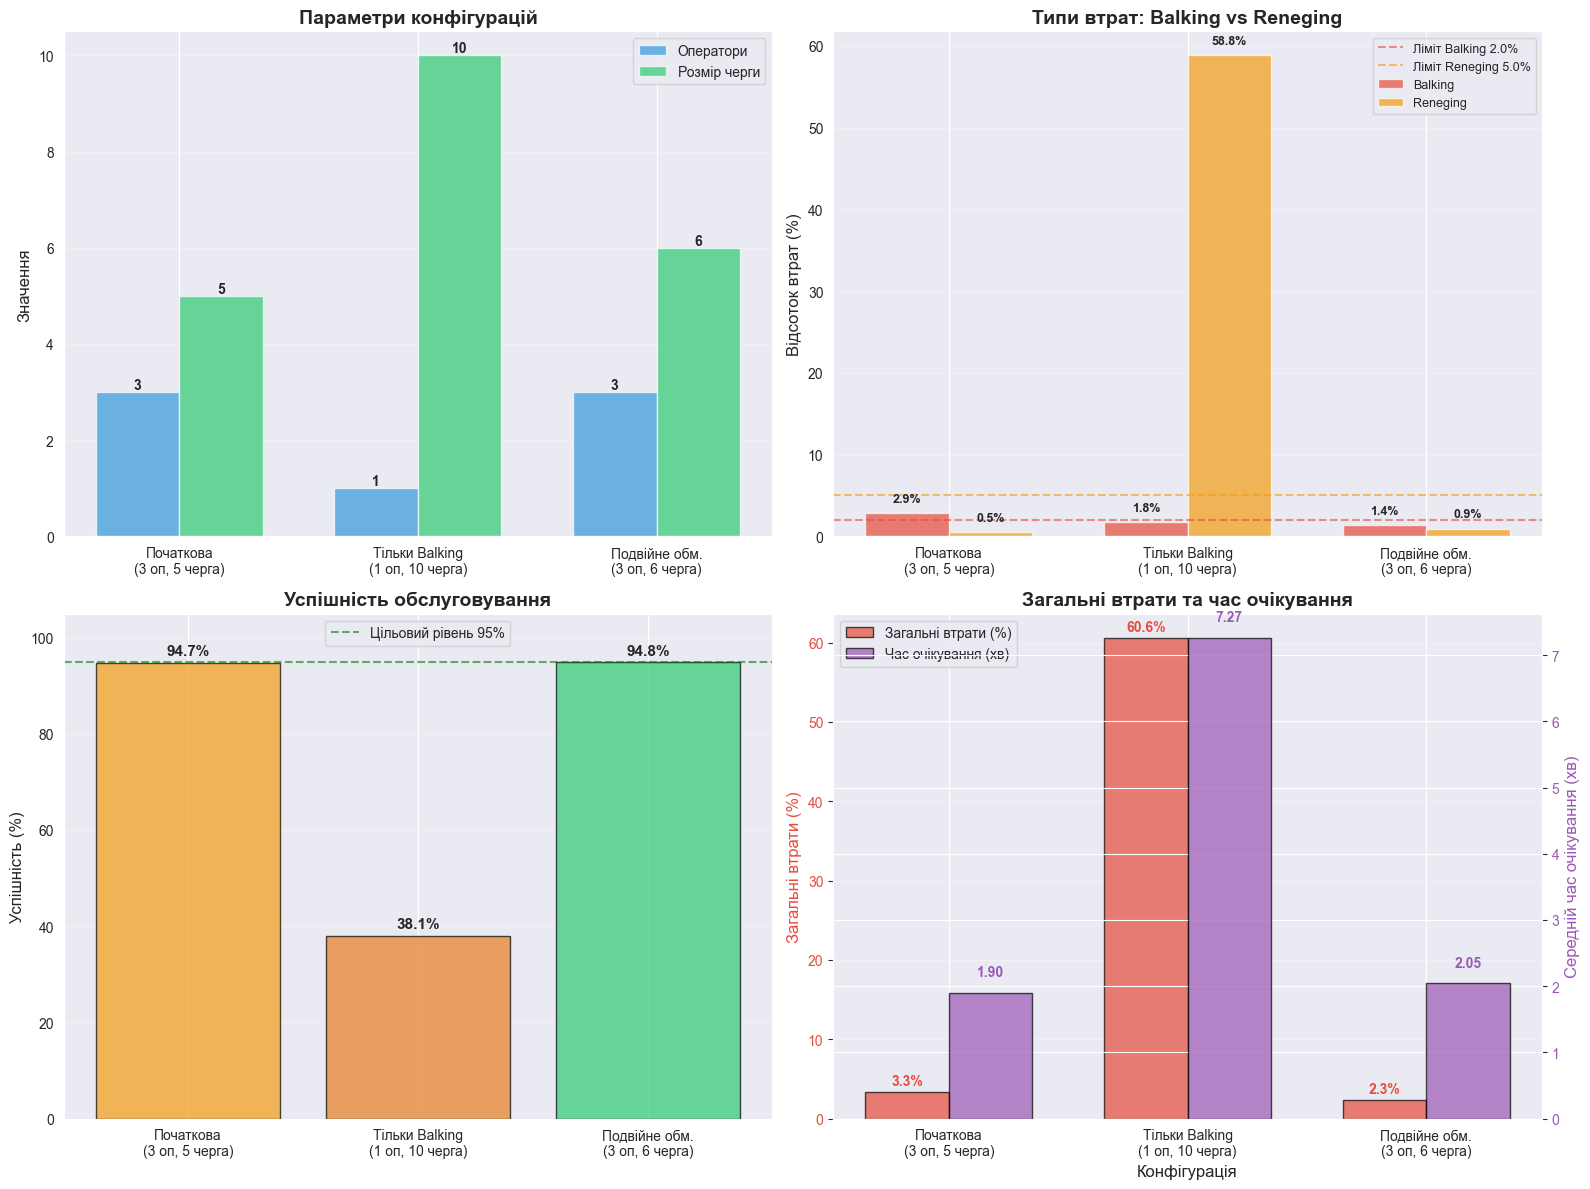


–ü–û–†–Ü–í–ù–Ø–ù–ù–Ø –¢–†–¨–û–• –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–ô

–ü–∞—Ä–∞–º–µ—Ç—Ä                            –ü–æ—á–∞—Ç–∫–æ–≤–∞            –¢—ñ–ª—å–∫–∏ Balking       –ü–æ–¥–≤—ñ–π–Ω–µ –æ–±–º.       
----------------------------------------------------------------------------------------------------
–û–ø–µ—Ä–∞—Ç–æ—Ä–∏                           3                    1                    3                   
–†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏                        5                    10                   6                   
Balking –≤—ñ–¥–º–æ–≤–∏ (%)                 2.87%                 1.77%                 1.41%
Reneging –≤—ñ–¥–º–æ–≤–∏ (%)                0.48%                 58.85%                 0.94%
–ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏ (%)                 3.35%                 60.62%                 2.35%
–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å (%)                      94.7%                 38.1%                 94.8%
–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)        1.90                   7.27                   

KeyError: 'cost'

In [16]:
if best_dual_config:
    # –¢—Ä–∏ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó –¥–ª—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è
    initial_cfg = quick_sim(3, 5)
    balking_only_cfg = best_config  # –ó –ø–æ–ø–µ—Ä–µ–¥–Ω—å–æ–≥–æ –µ–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç—É
    dual_cfg = best_dual_config
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è –ø–∞—Ä–∞–º–µ—Ç—Ä—ñ–≤
    configs_labels = [
        f'–ü–æ—á–∞—Ç–∫–æ–≤–∞\n({initial_cfg["operators"]} –æ–ø, {initial_cfg["queue_size"]} —á–µ—Ä–≥–∞)',
        f'–¢—ñ–ª—å–∫–∏ Balking\n({balking_only_cfg["operators"]} –æ–ø, {balking_only_cfg["queue_size"]} —á–µ—Ä–≥–∞)',
        f'–ü–æ–¥–≤—ñ–π–Ω–µ –æ–±–º.\n({dual_cfg["operators"]} –æ–ø, {dual_cfg["queue_size"]} —á–µ—Ä–≥–∞)'
    ]
    
    operators_data = [initial_cfg['operators'], balking_only_cfg['operators'], dual_cfg['operators']]
    queue_data = [initial_cfg['queue_size'], balking_only_cfg['queue_size'], dual_cfg['queue_size']]
    
    x = np.arange(len(configs_labels))
    width = 0.35
    
    bars1 = axes[0, 0].bar(x - width/2, operators_data, width, label='–û–ø–µ—Ä–∞—Ç–æ—Ä–∏', color='#3498db', alpha=0.7)
    bars2 = axes[0, 0].bar(x + width/2, queue_data, width, label='–†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏', color='#2ecc71', alpha=0.7)
    axes[0, 0].set_ylabel('–ó–Ω–∞—á–µ–Ω–Ω—è', fontsize=12)
    axes[0, 0].set_title('–ü–∞—Ä–∞–º–µ—Ç—Ä–∏ –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ–π', fontsize=14, fontweight='bold')
    axes[0, 0].set_xticks(x)
    axes[0, 0].set_xticklabels(configs_labels)
    axes[0, 0].legend()
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
    for bar in bars1:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    for bar in bars2:
        height = bar.get_height()
        axes[0, 0].text(bar.get_x() + bar.get_width()/2., height,
                       f'{int(height)}', ha='center', va='bottom', fontsize=10, fontweight='bold')
    
    # 2. –ü–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è Balking —Ç–∞ Reneging
    balking_data = [initial_cfg['balked_pct'], balking_only_cfg['balked_pct'], dual_cfg['balked_pct']]
    reneging_data = [initial_cfg['reneged_pct'], balking_only_cfg['reneged_pct'], dual_cfg['reneged_pct']]
    
    x_pos = np.arange(len(configs_labels))
    width = 0.35
    
    bars3 = axes[0, 1].bar(x_pos - width/2, balking_data, width, label='Balking', color='#e74c3c', alpha=0.7)
    bars4 = axes[0, 1].bar(x_pos + width/2, reneging_data, width, label='Reneging', color='#f39c12', alpha=0.7)
    
    axes[0, 1].axhline(y=TARGET_BALKING, color='#e74c3c', linestyle='--', linewidth=1.5, 
                       label=f'–õ—ñ–º—ñ—Ç Balking {TARGET_BALKING}%', alpha=0.6)
    axes[0, 1].axhline(y=TARGET_RENEGING, color='#f39c12', linestyle='--', linewidth=1.5, 
                       label=f'–õ—ñ–º—ñ—Ç Reneging {TARGET_RENEGING}%', alpha=0.6)
    
    axes[0, 1].set_ylabel('–í—ñ–¥—Å–æ—Ç–æ–∫ –≤—Ç—Ä–∞—Ç (%)', fontsize=12)
    axes[0, 1].set_title('–¢–∏–ø–∏ –≤—Ç—Ä–∞—Ç: Balking vs Reneging', fontsize=14, fontweight='bold')
    axes[0, 1].set_xticks(x_pos)
    axes[0, 1].set_xticklabels(configs_labels)
    axes[0, 1].legend(fontsize=9)
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
    for bar in bars3:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    for bar in bars4:
        height = bar.get_height()
        axes[0, 1].text(bar.get_x() + bar.get_width()/2., height + 1,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold')
    
    # 3. –£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è
    success_data = [
        initial_cfg['processed'] / initial_cfg['total_calls'] * 100,
        balking_only_cfg['processed'] / balking_only_cfg['total_calls'] * 100,
        dual_cfg['processed'] / dual_cfg['total_calls'] * 100
    ]
    
    colors_success = ['#f39c12', '#e67e22', '#2ecc71']
    bars5 = axes[1, 0].bar(configs_labels, success_data, color=colors_success, alpha=0.7, edgecolor='black')
    axes[1, 0].set_ylabel('–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å (%)', fontsize=12)
    axes[1, 0].set_title('–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è', fontsize=14, fontweight='bold')
    axes[1, 0].set_ylim(0, 105)
    axes[1, 0].grid(axis='y', alpha=0.3)
    axes[1, 0].axhline(y=95, color='green', linestyle='--', linewidth=1.5, 
                       label='–¶—ñ–ª—å–æ–≤–∏–π —Ä—ñ–≤–µ–Ω—å 95%', alpha=0.6)
    axes[1, 0].legend()
    
    # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
    for bar in bars5:
        height = bar.get_height()
        axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                       f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    # 4. –ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏ + –ß–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è
    total_loss = [
        initial_cfg['balked_pct'] + initial_cfg['reneged_pct'],
        balking_only_cfg['balked_pct'] + balking_only_cfg['reneged_pct'],
        dual_cfg['balked_pct'] + dual_cfg['reneged_pct']
    ]
    
    wait_times = [initial_cfg['avg_wait'], balking_only_cfg['avg_wait'], dual_cfg['avg_wait']]
    
    ax4a = axes[1, 1]
    ax4b = ax4a.twinx()
    
    x_pos = np.arange(len(configs_labels))
    width = 0.35
    
    bars6 = ax4a.bar(x_pos - width/2, total_loss, width, label='–ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏ (%)', 
                     color='#e74c3c', alpha=0.7, edgecolor='black')
    bars7 = ax4b.bar(x_pos + width/2, wait_times, width, label='–ß–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)', 
                     color='#9b59b6', alpha=0.7, edgecolor='black')
    
    ax4a.set_xlabel('–ö–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—è', fontsize=12)
    ax4a.set_ylabel('–ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏ (%)', fontsize=12, color='#e74c3c')
    ax4b.set_ylabel('–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)', fontsize=12, color='#9b59b6')
    ax4a.set_title('–ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏ —Ç–∞ —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è', fontsize=14, fontweight='bold')
    ax4a.set_xticks(x_pos)
    ax4a.set_xticklabels(configs_labels)
    ax4a.tick_params(axis='y', labelcolor='#e74c3c')
    ax4b.tick_params(axis='y', labelcolor='#9b59b6')
    ax4a.grid(axis='y', alpha=0.3)
    
    # –î–æ–¥–∞—î–º–æ –∑–Ω–∞—á–µ–Ω–Ω—è
    for bar in bars6:
        height = bar.get_height()
        ax4a.text(bar.get_x() + bar.get_width()/2., height + 0.5,
                 f'{height:.1f}%', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#e74c3c')
    for bar in bars7:
        height = bar.get_height()
        ax4b.text(bar.get_x() + bar.get_width()/2., height + 0.2,
                 f'{height:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold', color='#9b59b6')
    
    # –õ–µ–≥–µ–Ω–¥–∏
    lines1, labels1 = ax4a.get_legend_handles_labels()
    lines2, labels2 = ax4b.get_legend_handles_labels()
    ax4a.legend(lines1 + lines2, labels1 + labels2, loc='upper left', fontsize=10)
    
    plt.tight_layout()
    plt.show()
    
    # –ó–≤–µ–¥–µ–Ω–∞ —Ç–∞–±–ª–∏—Ü—è –ø–æ—Ä—ñ–≤–Ω—è–Ω–Ω—è
    print("\n" + "=" * 100)
    print("–ü–û–†–Ü–í–ù–Ø–ù–ù–Ø –¢–†–¨–û–• –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–ô")
    print("=" * 100)
    print(f"\n{'–ü–∞—Ä–∞–º–µ—Ç—Ä':<35} {'–ü–æ—á–∞—Ç–∫–æ–≤–∞':<20} {'–¢—ñ–ª—å–∫–∏ Balking':<20} {'–ü–æ–¥–≤—ñ–π–Ω–µ –æ–±–º.':<20}")
    print("-" * 100)
    print(f"{'–û–ø–µ—Ä–∞—Ç–æ—Ä–∏':<35} {initial_cfg['operators']:<20} {balking_only_cfg['operators']:<20} {dual_cfg['operators']:<20}")
    print(f"{'–†–æ–∑–º—ñ—Ä —á–µ—Ä–≥–∏':<35} {initial_cfg['queue_size']:<20} {balking_only_cfg['queue_size']:<20} {dual_cfg['queue_size']:<20}")
    print(f"{'Balking –≤—ñ–¥–º–æ–≤–∏ (%)':<35} {initial_cfg['balked_pct']:.2f}%{'':<16} {balking_only_cfg['balked_pct']:.2f}%{'':<16} {dual_cfg['balked_pct']:.2f}%")
    print(f"{'Reneging –≤—ñ–¥–º–æ–≤–∏ (%)':<35} {initial_cfg['reneged_pct']:.2f}%{'':<16} {balking_only_cfg['reneged_pct']:.2f}%{'':<16} {dual_cfg['reneged_pct']:.2f}%")
    print(f"{'–ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏ (%)':<35} {total_loss[0]:.2f}%{'':<16} {total_loss[1]:.2f}%{'':<16} {total_loss[2]:.2f}%")
    print(f"{'–£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å (%)':<35} {success_data[0]:.1f}%{'':<16} {success_data[1]:.1f}%{'':<16} {success_data[2]:.1f}%")
    print(f"{'–°–µ—Ä–µ–¥–Ω—ñ–π —á–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è (—Ö–≤)':<35} {initial_cfg['avg_wait']:.2f}{'':<18} {balking_only_cfg['avg_wait']:.2f}{'':<18} {dual_cfg['avg_wait']:.2f}")
    print(f"{'–£–º–æ–≤–Ω–∞ –≤–∞—Ä—Ç—ñ—Å—Ç—å':<35} {initial_cfg['cost']:.1f}{'':<18} {balking_only_cfg['cost']:.1f}{'':<18} {dual_cfg['cost']:.1f}")
    print("=" * 100)
    
    # –î–µ—Ç–∞–ª—å–Ω–∏–π –≤–∏—Å–Ω–æ–≤–æ–∫
    print("\n" + "üéØ " * 25)
    print("–í–ò–°–ù–û–í–ö–ò:")
    print("üéØ " * 25 + "\n")
    
    print("1. –ü–û–ß–ê–¢–ö–û–í–ê –ö–û–ù–§–Ü–ì–£–†–ê–¶–Ü–Ø (3 –æ–ø–µ—Ä–∞—Ç–æ—Ä–∏, —á–µ—Ä–≥–∞ 5):")
    print(f"   ‚úì –ó–±–∞–ª–∞–Ω—Å–æ–≤–∞–Ω–∞, –∞–ª–µ –º–∞—î {initial_cfg['balked_pct']:.1f}% Balking")
    print(f"   ‚úì –£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å: {success_data[0]:.1f}%")
    print(f"   ‚úó Balking ({initial_cfg['balked_pct']:.1f}%) –ø–µ—Ä–µ–≤–∏—â—É—î –ª—ñ–º—ñ—Ç {TARGET_BALKING}%\n")
    
    print(f"2. –û–ü–¢–ò–ú–Ü–ó–ê–¶–Ü–Ø –¢–Ü–õ–¨–ö–ò –ü–û BALKING ({balking_only_cfg['operators']} –æ–ø–µ—Ä–∞—Ç–æ—Ä, —á–µ—Ä–≥–∞ {balking_only_cfg['queue_size']}):")
    print(f"   ‚úì Balking –∑–Ω–∏–∂–µ–Ω–æ –¥–æ {balking_only_cfg['balked_pct']:.1f}% (–¥–æ—Å—è–≥–Ω—É—Ç–æ –º–µ—Ç—É!)")
    print(f"   ‚úó –ü–†–û–ë–õ–ï–ú–ê: Reneging –∑—Ä—ñ—Å –¥–æ {balking_only_cfg['reneged_pct']:.1f}%")
    print(f"   ‚úó –£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å –≤–ø–∞–ª–∞ –¥–æ {success_data[1]:.1f}%")
    print(f"   ‚úó –ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏: {total_loss[1]:.1f}% - –Ω–∞–π–≥—ñ—Ä—à–∏–π –ø–æ–∫–∞–∑–Ω–∏–∫!\n")
    
    print(f"3. –ü–û–î–í–Ü–ô–ù–ê –û–ü–¢–ò–ú–Ü–ó–ê–¶–Ü–Ø ({dual_cfg['operators']} –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤, —á–µ—Ä–≥–∞ {dual_cfg['queue_size']}):")
    print(f"   ‚úì Balking: {dual_cfg['balked_pct']:.1f}% < {TARGET_BALKING}% ‚úì")
    print(f"   ‚úì Reneging: {dual_cfg['reneged_pct']:.1f}% < {TARGET_RENEGING}% ‚úì")
    print(f"   ‚úì –£—Å–ø—ñ—à–Ω—ñ—Å—Ç—å: {success_data[2]:.1f}% - –ù–ê–ô–ö–†–ê–©–ò–ô –ø–æ–∫–∞–∑–Ω–∏–∫!")
    print(f"   ‚úì –ó–∞–≥–∞–ª—å–Ω—ñ –≤—Ç—Ä–∞—Ç–∏: {total_loss[2]:.1f}% - –º—ñ–Ω—ñ–º–∞–ª—å–Ω—ñ!")
    print(f"   ‚úì –ß–∞—Å –æ—á—ñ–∫—É–≤–∞–Ω–Ω—è: {dual_cfg['avg_wait']:.2f} —Ö–≤ - –ø—Ä–∏–π–Ω—è—Ç–Ω–∏–π\n")
    
    print("üí° –†–ï–ö–û–ú–ï–ù–î–ê–¶–Ü–Ø:")
    print(f"   –í–∏–∫–æ—Ä–∏—Å—Ç–æ–≤—É–≤–∞—Ç–∏ –ü–û–î–í–Ü–ô–ù–£ –û–ü–¢–ò–ú–Ü–ó–ê–¶–Ü–Æ: {dual_cfg['operators']} –æ–ø–µ—Ä–∞—Ç–æ—Ä—ñ–≤ + —á–µ—Ä–≥–∞ {dual_cfg['queue_size']}")
    print(f"   –¶–µ –∑–∞–±–µ–∑–ø–µ—á—É—î –Ω–∞–π–∫—Ä–∞—â–∏–π –±–∞–ª–∞–Ω—Å –º—ñ–∂ –≤–∞—Ä—Ç—ñ—Å—Ç—é —Ç–∞ —è–∫—ñ—Å—Ç—é –æ–±—Å–ª—É–≥–æ–≤—É–≤–∞–Ω–Ω—è!")
    print("\n" + "üéØ " * 25)
    
else:
    print("‚ö†Ô∏è –ù–µ–º–æ–∂–ª–∏–≤–æ —Å—Ç–≤–æ—Ä–∏—Ç–∏ –≤—ñ–∑—É–∞–ª—ñ–∑–∞—Ü—ñ—é - –Ω–µ –∑–Ω–∞–π–¥–µ–Ω–æ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ—ó –∫–æ–Ω—Ñ—ñ–≥—É—Ä–∞—Ü—ñ—ó –∑ –ø–æ–¥–≤—ñ–π–Ω–∏–º –æ–±–º–µ–∂–µ–Ω–Ω—è–º")